In [ ]:
# Question 1.A

import numpy as np

def softmax(z):
    exp_z = np.exp(z) 
    return np.round(exp_z / np.sum(exp_z), 4)

# Example usage
z = np.array([3.0, 1.0, -2.0]) 
print(softmax(z))


[0.8756 0.1185 0.0059]


Question 1.B
$
\sigma(z_i + c) = \sigma(z_i)
$

$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$

$
\sigma(z_i + c) = \frac{e^{z_i + c}}{\sum_{j=1}^{n} e^{z_j + c}}
$

$
\sigma(z_i + c) = \frac{e^{z_i} e^c}{\sum_{j=1}^{n} e^{z_j} e^c}
$

$
\sigma(z_i + c) = \frac{e^c e^{z_i}}{e^c \sum_{j=1}^{n} e^{z_j}}
$

$
\sigma(z_i + c) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$

$
\sigma(z_i + c) = \sigma(z_i)
$

In [16]:
#1.B continued
c, d, e = 5.0, 4.0, -300
z_shifted1 = z + c
z_shifted2 = z + d
z_shifted3 = z + e

# Compute softmax for both
softmax_original = softmax(z)
softmax_shifted = softmax(z_shifted1), softmax(z_shifted2), softmax(z_shifted3), 

print(f"Original output:\n\n{softmax_original}")
print("\nScaled outputs:")
print("  ", *softmax_shifted, sep="\n")

#as we can see the output is the same for everything

Original output:

[0.8756 0.1185 0.0059]

Scaled outputs:
  
[0.8756 0.1185 0.0059]
[0.8756 0.1185 0.0059]
[0.8756 0.1185 0.0059]


1.C

$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{k=1}^{n} e^{z_k}}
$


$
S = \sum_{k=1}^{n} e^{z_k}
$


$
\sigma(z_i) = \frac{e^{z_i}}{S}
$


#### **Case 1: When $ i = j $**
$
\frac{\partial \sigma(z_i)}{\partial z_i} = \frac{\partial}{\partial z_i} \left( \frac{e^{z_i}}{S} \right)
$


$
\frac{\partial \sigma(z_i)}{\partial z_i} = \frac{e^{z_i} S - e^{z_i} e^{z_i}}{S^2}
$


$
\frac{\partial \sigma(z_i)}{\partial z_i} = \frac{e^{z_i} (S - e^{z_i})}{S^2}
$


$
\frac{\partial \sigma(z_i)}{\partial z_i} = \sigma(z_i) \left( 1 - \sigma(z_i) \right)
$

#### **Case 2: When $ i \neq j $**

$
\frac{\partial \sigma(z_i)}{\partial z_j} = \frac{\partial}{\partial z_j} \left( \frac{e^{z_i}}{S} \right)
$


$
\frac{\partial \sigma(z_i)}{\partial z_j} = \frac{0 \cdot S - e^{z_i} e^{z_j}}{S^2}
$


$
\frac{\partial \sigma(z_i)}{\partial z_j} = - \sigma(z_i) \sigma(z_j)
$

### **Final Answer**
$
\frac{\partial \sigma(z_i)}{\partial z_j} =
\begin{cases}
\sigma(z_i) (1 - \sigma(z_i)), & \text{if } i = j \\
-\sigma(z_i) \sigma(z_j), & \text{if } i \neq j
\end{cases}
$



In [ ]:
# 1.D
z1 = np.array([5, 2, -1])
z2 = np.array([50, 20, -10])

softmax_z1 = softmax(z1)
softmax_z2 = softmax(z2)

# Print results
print("Softmax of (5, 2, -1):", softmax_z1)
print("Softmax of (50, 20, -10):", softmax_z2)

Softmax of (5, 2, -1): [0.9503 0.0473 0.0024]
Softmax of (50, 20, -10): [1. 0. 0.]


1.D continued
What do you observe about numerical stability? How can this issue be addressed in practical implementations?
we find that as the size of the values increases, the denominator grows very fast the the values compute to pretty much zero, we find with the smaller sized inputs, the output is well distributed

to remedy this we could just compute to more decimal places but that becomes quickly impractical, since earlier we have shown that when scaling the softmax, the values stay the same so if we shift them all down to where the largest is 0 and the rest go negative, the exponents wont chase so quickly to infinity and make the output 0, this is because the negative exponents chase to 0 much slower than positive exponents race to practical infinity

1.E


$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$

For two logits, \(z_1\) and \(z_2\), we can write:

$
\sigma(z_1) = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}, \quad \sigma(z_2) = \frac{e^{z_2}}{e^{z_1} + e^{z_2}}
$

### the ratio of softmax values

The ratio \(\frac{\sigma(z_1)}{\sigma(z_2)}\) is:

$
\frac{\sigma(z_1)}{\sigma(z_2)} = \frac{\frac{e^{z_1}}{e^{z_1} + e^{z_2}}}{\frac{e^{z_2}}{e^{z_1} + e^{z_2}}} = \frac{e^{z_1}}{e^{z_2}} = e^{z_1 - z_2}
$


as z1 increases more than z2 we can see that the output value rises sharply, σ(z1​) becomes much larger than σ(z2). and the other was around is true, as z2 increases faster than z1, the value gets closer and closer to 0, using this info we find that the softmax function amplifies the difference between logits

/home/achin/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-14 20:20:37.450684: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training Model 1...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3519 - loss: 1.7707 - val_accuracy: 0.5420 - val_loss: 1.2841
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5560 - loss: 1.2545 - val_accuracy: 0.5796 - val_loss: 1.1772
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6099 - loss: 1.1046 - val_accuracy: 0.6058 - val_loss: 1.1142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6389 - loss: 1.0235 - val_accuracy: 0.6304 - val_loss: 1.0480
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6638 - loss: 0.9575 - val_accuracy: 0.6386 - val_loss: 1.0255
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6828 - loss: 0.8997 - val_accuracy: 0.6526 - val_loss: 1.0077
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.8470 - val_accuracy: 0.6502 - val_loss: 1.0136
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accura

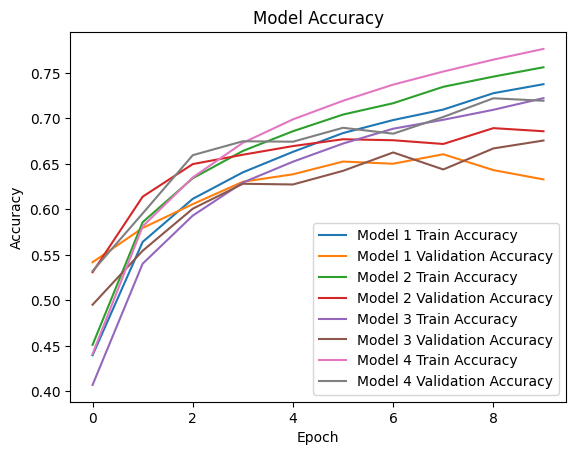

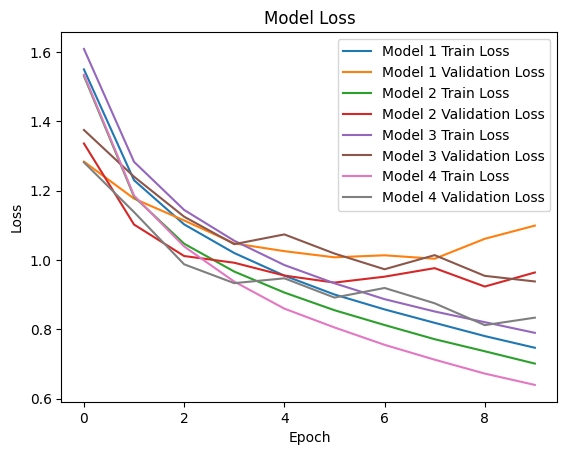

In [17]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(cifar_images, cifar_labels), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the input images
cifar_images = cifar_images / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
cifar_labels = tf.keras.utils.to_categorical(cifar_labels, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Design four CNN models to classify CIFAR-10 images with the following features
def create_model(filters):
    model = models.Sequential()
    for f in filters:
        model.add(layers.Conv2D(f, (3 if f > 16 else 5, 3 if f > 16 else 5), activation='relu',
                                input_shape=(32, 32, 3) if f == filters[0] else None))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define model structures
filters_list = [
    [16, 32],  # First structure
    [32, 64],  # Second structure
    [16, 32, 64],  # Third structure
    [32, 64, 64]  # Fourth structure
]

# Compile the model
models_list = []
histories = []
for filters in filters_list:
    model = create_model(filters)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    models_list.append(model)

# Train the model for at least 10 epochs
for idx, model in enumerate(models_list):
    print(f"Training Model {idx + 1}...")
    history = model.fit(cifar_images, cifar_labels, epochs=10,
                        validation_data=(x_test, y_test), verbose=1)
    histories.append(history)

# Evaluate the model
for idx, model in enumerate(models_list):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\nTest accuracy for Model {idx + 1}: {test_acc}")

# Plot training & validation accuracy values for all different models
for idx, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Model {idx + 1} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'Model {idx + 1} Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
for idx, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Model {idx + 1} Train Loss')
    plt.plot(history.history['val_loss'], label=f'Model {idx + 1} Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
